<a href="https://colab.research.google.com/github/bangkitgroupassigment1/Assignment_05/blob/master/playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
sns.set(style="darkgrid")
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [4]:
# read the Google Playstore csv file
apps = pd.read_csv("Google-Playstore-32K.csv")
# App Name will be unvaluable feature so we remove it
# Last Update indicates the time the last version of the app released. It also won't give much impact as feature
# Latest Version indicates the last version of the app released. It also won't give much impact as feature
apps = apps.drop(columns=['App Name', 'Last Updated', 'Latest Version'])
apps = apps.rename(columns={'Minimum Version': 'Minimum_Version', 'Content Rating': 'Content_Rating'})
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 8 columns):
Category           32000 non-null object
Rating             32000 non-null object
Reviews            31999 non-null float64
Installs           32000 non-null object
Size               32000 non-null object
Price              32000 non-null object
Content_Rating     32000 non-null object
Minimum_Version    32000 non-null object
dtypes: float64(1), object(7)
memory usage: 2.0+ MB


## Cleaning the data
remove the string "+ M $ ," from the Installs, Size and Price. remove Strings that are inconvertible to numeric value to NaN.

In [0]:
string_to_remove = ["+", ",", "M", "$", "k"]
columns = ["Installs","Size", "Price", "Rating"]

# loop over columns that we want to remove a substring from
for col in columns:
    # remove string from columns one by one
    for string in string_to_remove:
        apps[col] = apps[col].str.replace(string, '')
    # convert the column to numeric
    apps[col] = pd.to_numeric(apps[col], errors="coerce")

In [6]:
# check the dataframe information after replacing the string
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 8 columns):
Category           32000 non-null object
Rating             31997 non-null float64
Reviews            31999 non-null float64
Installs           31999 non-null float64
Size               28805 non-null float64
Price              31999 non-null float64
Content_Rating     32000 non-null object
Minimum_Version    32000 non-null object
dtypes: float64(5), object(3)
memory usage: 2.0+ MB


In [7]:
# drop the rows with NaN value
# drop the rows with Redundant Value
print(apps.shape)
apps = apps.drop_duplicates(keep="first", inplace=False)
print(apps.shape)
apps = apps.dropna()

(32000, 8)
(31989, 8)


In [8]:
apps.info()
print(apps.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28791 entries, 2 to 31999
Data columns (total 8 columns):
Category           28791 non-null object
Rating             28791 non-null float64
Reviews            28791 non-null float64
Installs           28791 non-null float64
Size               28791 non-null float64
Price              28791 non-null float64
Content_Rating     28791 non-null object
Minimum_Version    28791 non-null object
dtypes: float64(5), object(3)
memory usage: 2.0+ MB
(28791, 8)


## Feature Selection Process

(28791,)
(28791, 7)
[42 3.656329393 1967.0 1.4 0.0 1 27]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28791 entries, 0 to 28790
Data columns (total 7 columns):
Category           28791 non-null object
Rating             28791 non-null object
Reviews            28791 non-null object
Size               28791 non-null object
Price              28791 non-null object
Content_Rating     28791 non-null object
Minimum_Version    28791 non-null object
dtypes: object(7)
memory usage: 1.5+ MB
None
             Specs         Score
2          Reviews  9.149391e+10
4            Price  2.726412e+04
3             Size  1.714796e+04
0         Category  1.977592e+03
5   Content_Rating  3.126476e+02
6  Minimum_Version  9.031657e+01
1           Rating  2.141688e+01


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[0.09930033 0.21270677 0.3710012  0.19489689 0.02519326 0.00897974
 0.08792182]


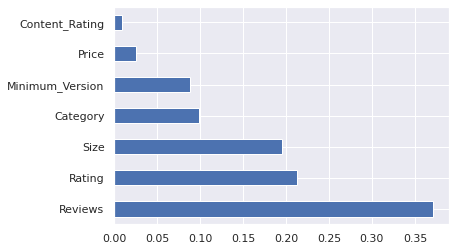

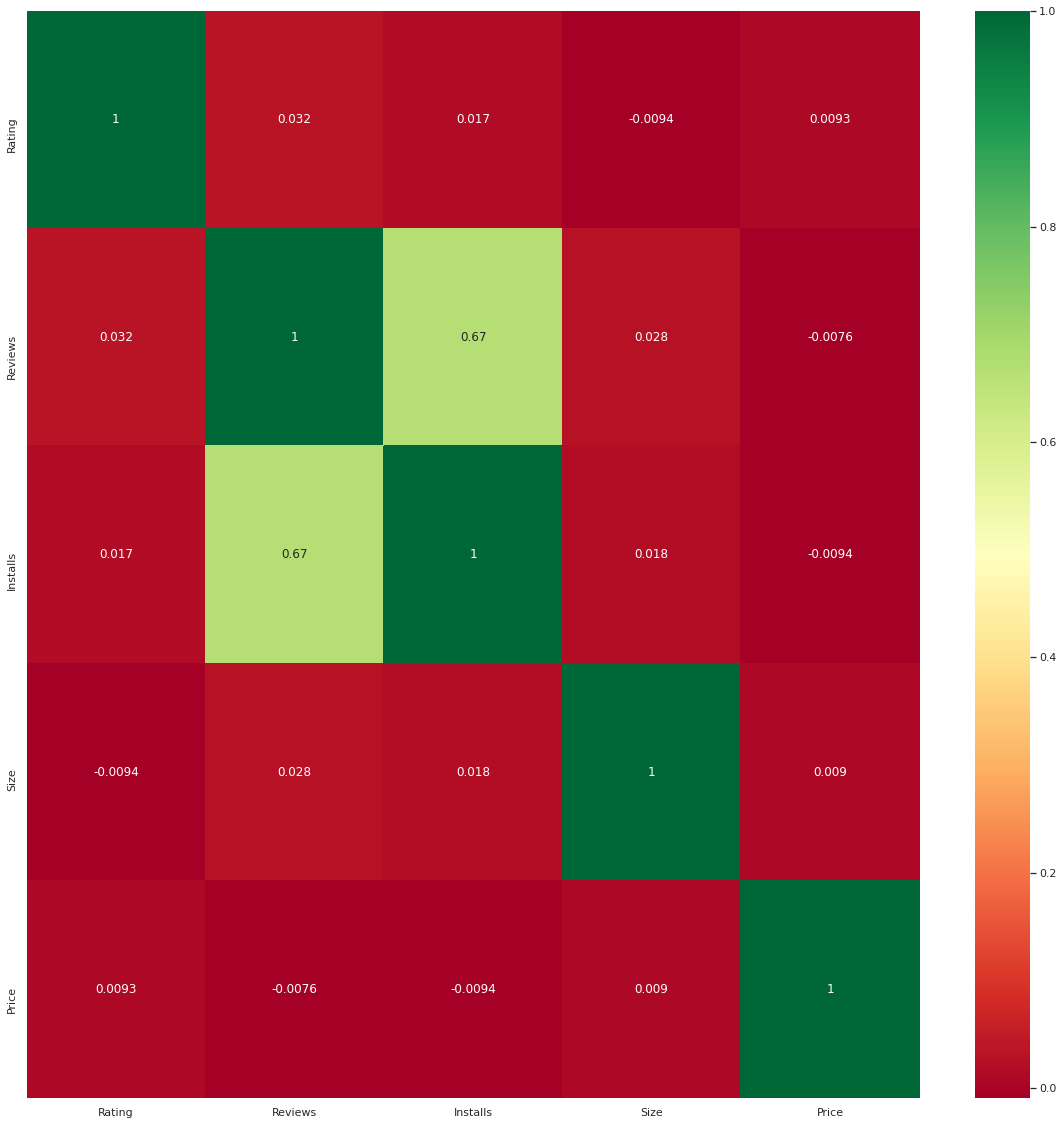

In [9]:
X = apps.iloc[:, apps.columns != 'Installs'].values
Y = apps.iloc[:, 3].values
# print(X.shape)
# print(Y.shape)

labelEncoder_Category =  LabelEncoder()
# print(apps.Category.unique())
X[:,0] = labelEncoder_Category.fit_transform(X[:,0])
# print(X[:4,:])

# print(apps.Minimum_Version.unique())
labelEncoder_MinimumVersion =  LabelEncoder()
# print(X[:4,:])
X[:,6] = labelEncoder_MinimumVersion.fit_transform(X[:,6])
# print(X[:4,:])

# print(apps.Rating.unique())
# print(X[:, 1])
# X[:, [1]] = np.vstack(X[:, [1]]).astype(np.float)
# print(X[:10, :])

# print(apps.Content_Rating.unique())
labelEncoder_Content_Rating =  LabelEncoder()
# print(X[:10, :])
X[:,5] = labelEncoder_Content_Rating.fit_transform(X[:,5])
# print(X[:10, :])


print(Y.shape)
print(X.shape)
print(X[0,:])
dataframeX = pd.DataFrame(X)
dataframeY = pd.DataFrame(Y)
dataframeX = dataframeX.rename(columns={0: "Category", 1: "Rating", 2: "Reviews", 3: "Size", 4: "Price", 5:"Content_Rating", 6:"Minimum_Version"})
print(dataframeX.info())
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(dataframeX,dataframeY)
appsScores = pd.DataFrame(fit.scores_)
appscolumns = pd.DataFrame(dataframeX.columns)
# #concat two dataframes for better visualization 
featureScores = pd.concat([appscolumns,appsScores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 5 best features


model = ExtraTreesClassifier()
dataframeX = dataframeX.rename(columns={0: "Category", 1: "Rating", 2: "Reviews", 3: "Size", 4: "Price", 5:"Content_Rating", 6:"Minimum_Version"})
model.fit(dataframeX,dataframeY)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dataframeX.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


corrmat = apps.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(apps[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Write preprocessed data to CSV
run the cell below to save dataframe to csv file

In [0]:
apps.to_csv("googleplaystore_processed.csv")

In [11]:
apps.sample(20)

,Category,Rating,Reviews,Installs,Size,Price,Content_Rating,Minimum_Version
22362,MAPS_AND_NAVIGATION,4.157761,2751.0,100000.0,10.0,0.00,Everyone,4.0 and up
31714,GAME_CARD,4.627109,13575.0,100000.0,22.0,0.00,Everyone,4.0.3 and up
15164,ENTERTAINMENT,4.256410,39.0,50000.0,3.6,0.00,Teen,4.2 and up
10299,HEALTH_AND_FITNESS,4.475862,870.0,100000.0,41.0,0.00,Everyone,5.0 and up
29689,SPORTS,3.708154,233.0,10000.0,17.0,0.00,Everyone,4.4 and up
14730,TRAVEL_AND_LOCAL,4.169322,2008.0,100000.0,81.0,0.00,Everyone,4.3 and up
6136,BOOKS_AND_REFERENCE,4.681035,116.0,10000.0,20.0,0.00,Everyone,4.0.3 and up
23943,ENTERTAINMENT,4.202073,772.0,100000.0,28.0,0.00,Everyone,5.0 and up
28478,TOOLS,4.692307,13.0,100.0,2.7,0.99,Everyone,7.0 and up
16098,TRAVEL_AND_LOCAL,3.988962,453.0,100000.0,38.0,0.00,Everyone,4.4 and up


## Check Distribution of apps across Categories

Number of category: 49


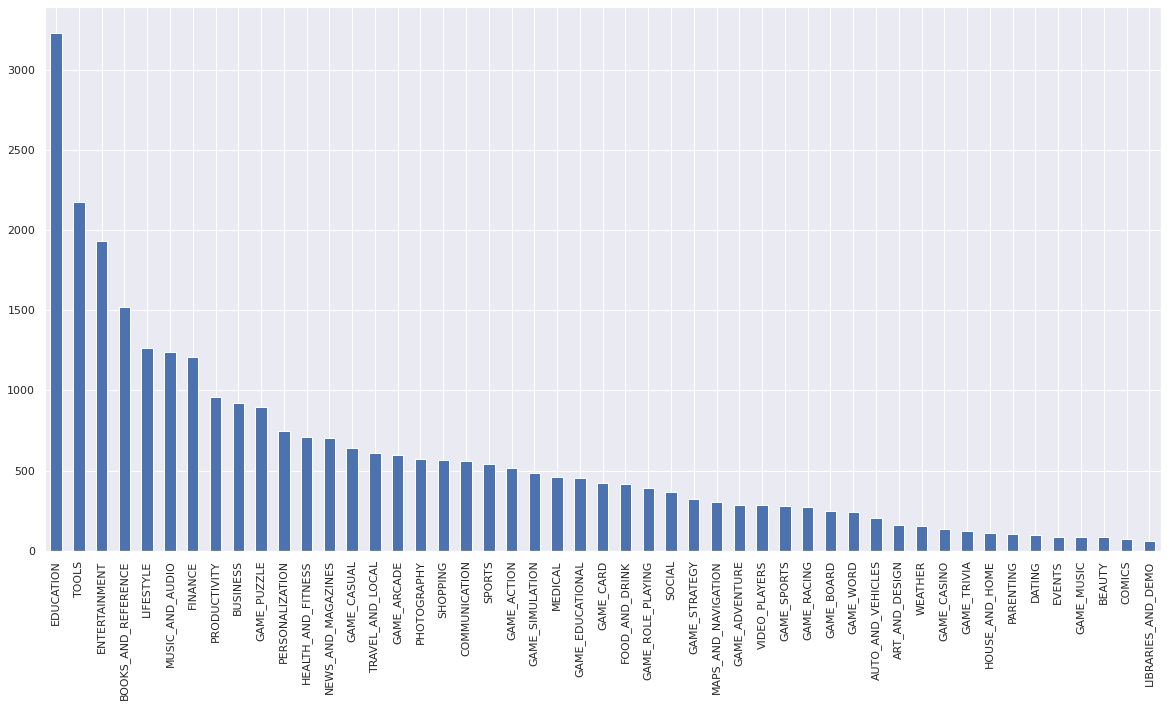

In [12]:
# Check number of apps in each category and sort by descending order
no_apps_by_category = apps["Category"].value_counts().sort_values(ascending=False)
print("Number of category:",len(no_apps_by_category))
no_apps_by_category.plot.bar(figsize=(20,10))

## App Rating Distribution
finding the distribution of apps with histogram

In [13]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.27000506954069


## Size vs Rating
seems that most apps with small size have higher rating

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


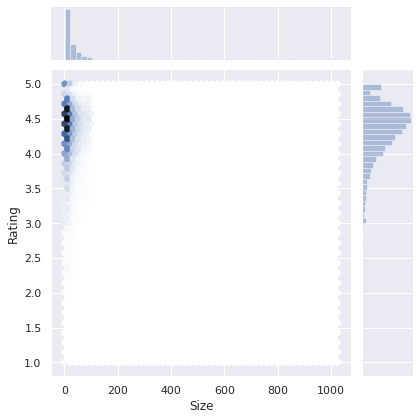

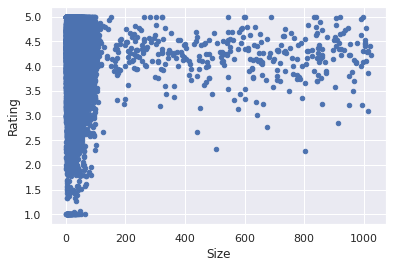

In [14]:
# Plot size vs Price
plot_size_vs_rating = sns.jointplot(x=apps["Size"], y=apps["Rating"], kind="hex")
plot_scatter = apps.plot.scatter(x="Size", y="Rating")

## Paid vs Rating
Cheaper apps mostly have higher rating. there are 2 apps which has too high of a price.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


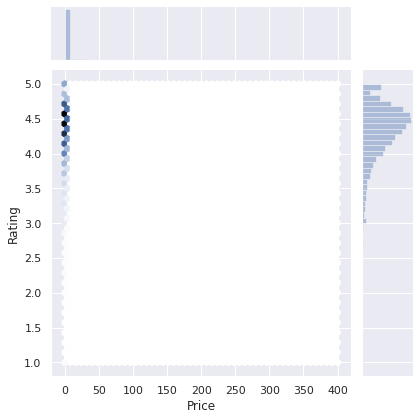

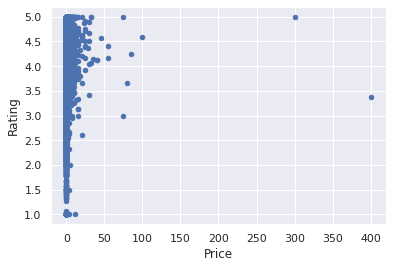

In [15]:
plot_price_vs_Rating = sns.jointplot(x=apps["Price"], y=apps["Rating"], kind="hex")
plot_scatter = apps.plot.scatter(x="Price", y="Rating")

In [16]:
# Apps with outlier price
apps[apps["Price"] > 250]

,Category,Rating,Reviews,Installs,Size,Price,Content_Rating,Minimum_Version
1154,GAME_PUZZLE,3.378378,74.0,1000.0,18.0,399.99,Everyone,4.0.3 and up
13935,FINANCE,5.000000,1.0,1.0,1.6,299.99,Everyone,4.0.3 and up


In [0]:
# remove the two outlier
apps.drop(apps[apps["Price"] > 250].index, inplace=True)

## Price vs Category

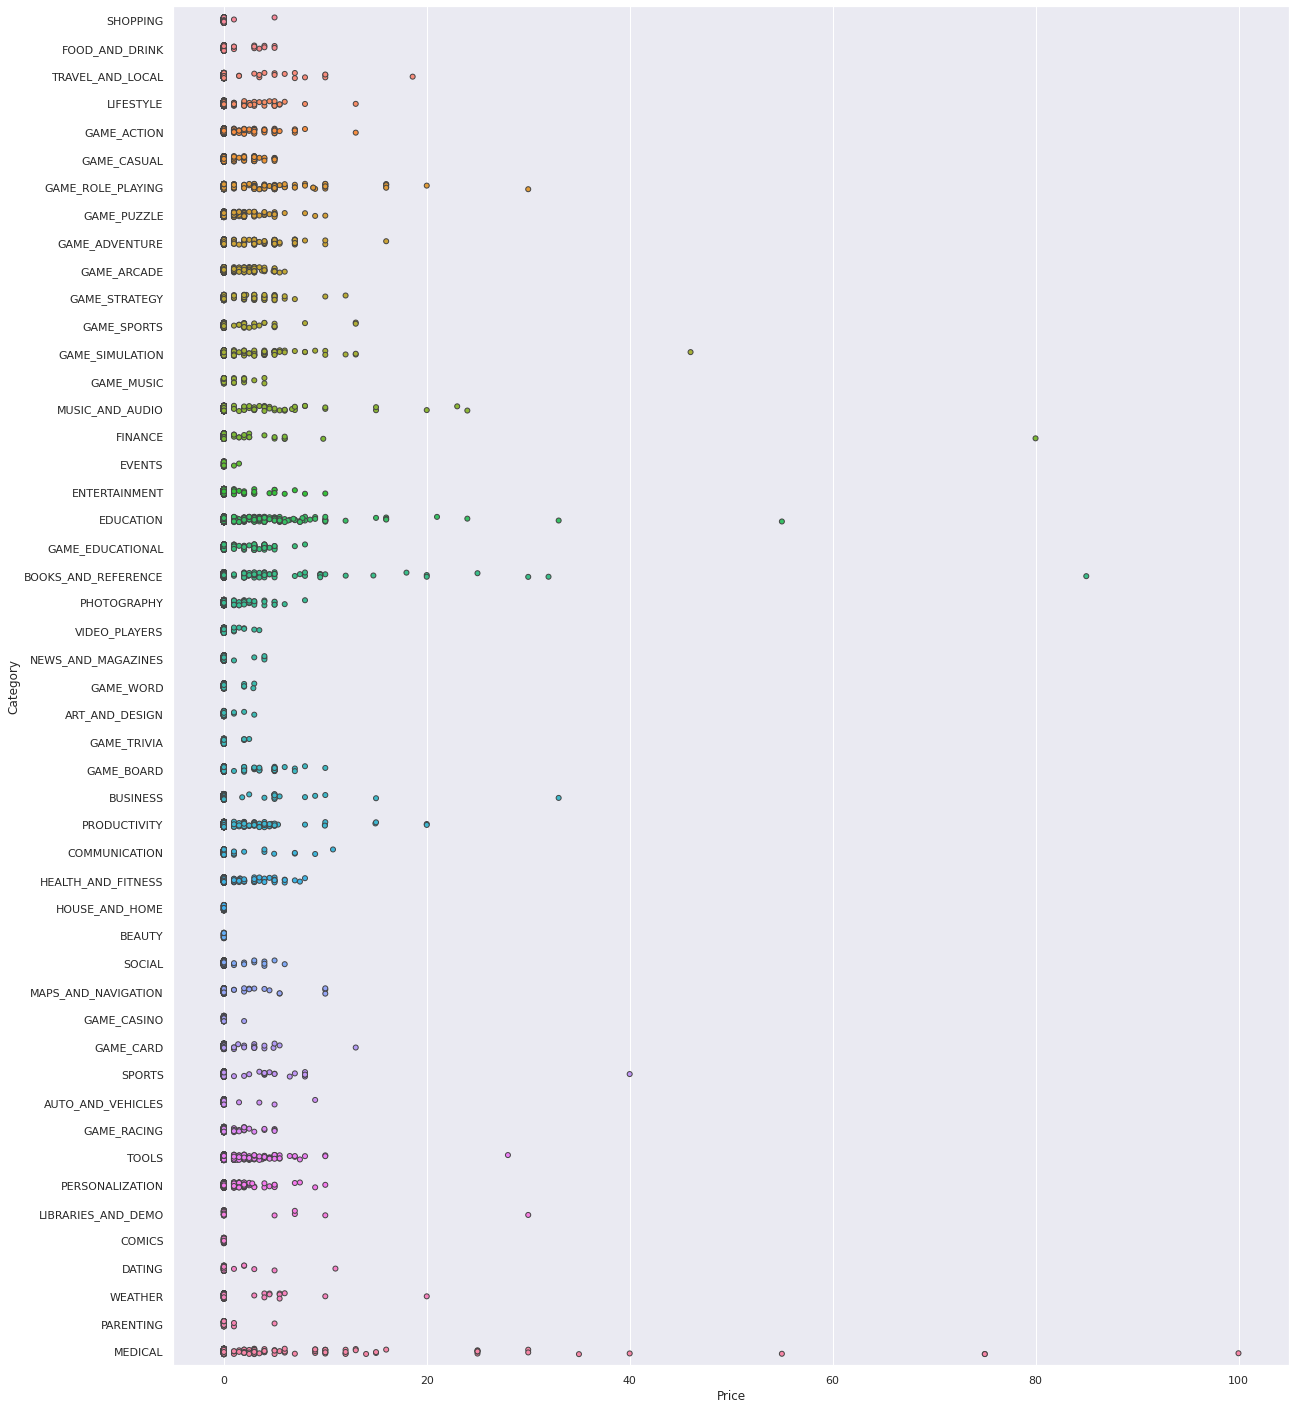

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 25)

# seems that we need to reduce the number of category
sns.stripplot(x="Price", y="Category", data=apps, linewidth=1)

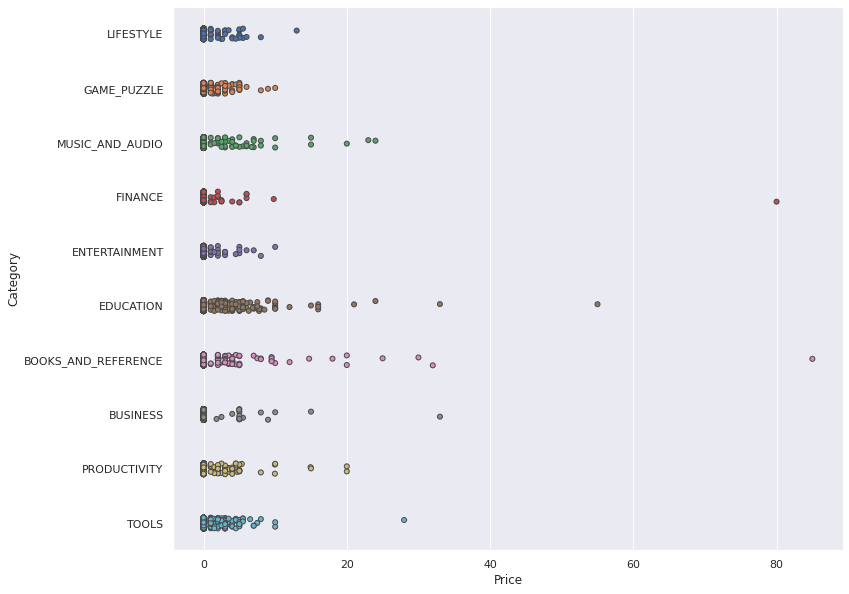

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)

# sort the apps by number of apps category in descending order
sorted_apps_by_category = apps["Category"].value_counts().sort_values(ascending=False)
# Take the first 15 Categories with most apps
category_list = list(sorted_apps_by_category.index[0:10])
apps_to_plot = apps[apps["Category"].isin(category_list)]
sns.stripplot(x="Price", y="Category", data=apps_to_plot, linewidth=1)

## Paid downloads vs Free downloads
more user downloads free apps than paid apps shown by the distribution. note that the dataset only contains less than 2000 paid apps.

([<matplotlib.axis.YTick at 0x7fbe20b092e8>,
 [Text(0, 0, '10'),
  Text(0, 0, '1k'),
  Text(0, 0, '100k'),
  Text(0, 0, '10M'),
  Text(0, 0, '1B')])

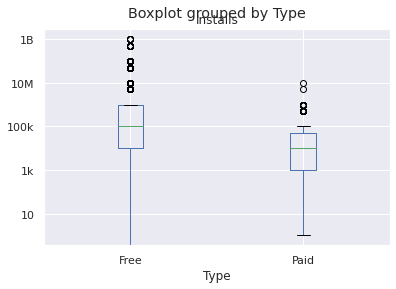

In [20]:
apps["Type"] = np.where(apps["Price"] > 0, "Paid","Free")
apps.boxplot(by="Type", column=["Installs"], grid=True)
plt.yscale('log')
plt.yticks([10, 1000, 100000, 10000000, 1000000000], ["10", "1k", "100k", "10M", "1B"])

## Making the label columns for the dataset

In [21]:
# Number of categories
apps["Category"]

2                  SHOPPING
3            FOOD_AND_DRINK
5            FOOD_AND_DRINK
8          TRAVEL_AND_LOCAL
12                LIFESTYLE
                ...        
31995    NEWS_AND_MAGAZINES
31996       GAME_SIMULATION
31997       GAME_SIMULATION
31998                 TOOLS
31999           GAME_PUZZLE
Name: Category, Length: 28789, dtype: object